# Pt1 Libraries

A (software) library is a collection of files (called modules) that contains functions for use by other programs.
* May also contain variables (e.g., numerical constants) and other things.
* The Python standard library has an extensive suite of modules that comes with Python itself. E.g. datetime module, string module, etc.
* Library needs to be imported before it can be use

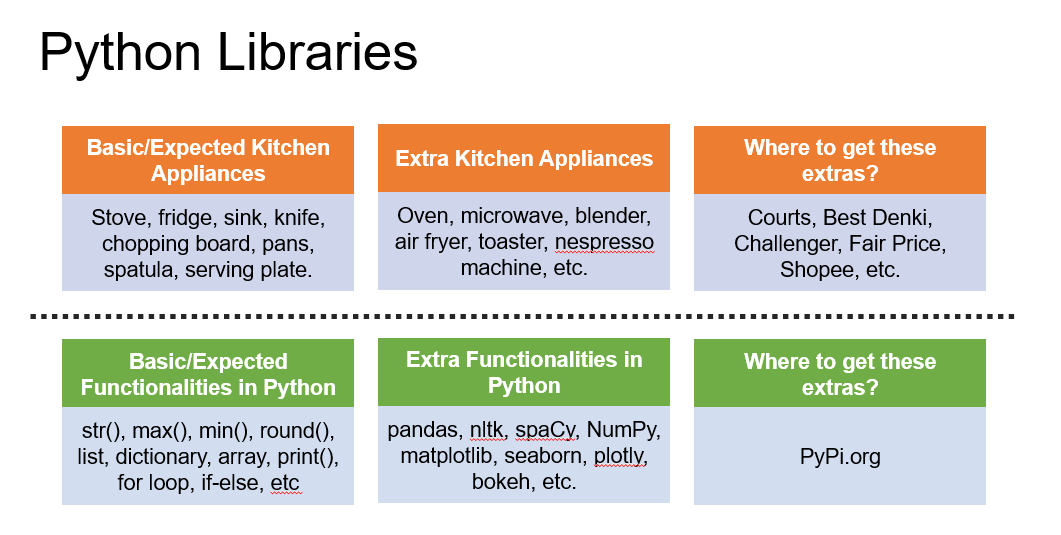

In [ ]:
import string

In [ ]:
help(string)

In [ ]:
print(string.ascii_lowercase)
print(string.capwords('hello world'))

* Use from ... import ... to load only specific items from a library module.
* Then refer to them directly without library name as prefix.

In [ ]:
from string import ascii_letters

print('The ASCII letters are', ascii_letters)

* Use import ... as ... to give a library a short alias while importing it.
* Then refer to items in the library using that shortened name.

In [ ]:
import string as s

print(s.capwords('hello world'))

In [ ]:
help(datetime)

# Pt2 Loading CSV to Dataframe

Pandas is a widely-used Python library for statistics, particularly on tabular data.
Borrows many features from R’s dataframes. Essentially, it is a 2-dimensional table whose columns have names and potentially have different data types.

In [ ]:
# this is how you would install a package/library:
pip install pandas #pandas is the name of the library

In [ ]:
#import the library; essential step before we can use it.
import pandas as pd #pd is a common alias for panda

In [ ]:
data = pd.read_csv('netflix.csv') # load the content of netflix.csv into the data variable
data

In [ ]:
# Optional: Use index_col to specify that a column’s values should be used as row headings.
data = pd.read_csv("netflix.csv", index_col="Title")
data

In [ ]:
# Use the DataFrame.info() method to find out more about a dataframe.
data.info()

In [ ]:
# The DataFrame.columns variable stores information about the dataframe’s columns.
# This one doesn't have parentheses because it's not a function, but a 
# variable inside the dataframe object (member variable)

data.columns

In [ ]:
# Use DataFrame.T to transpose a dataframe if you want to treat columns as rows and vice versa.
# Transpose (written .T) doesn’t copy the data, just changes the program’s view of it.
# Like columns, it is a member variable.

data.T

In [ ]:
# DataFrame.describe() gets the summary statistics of the columns that have numerical data. 
# All other columns are ignored, unless you use the argument include='all'.

data.describe(include="all")

In [ ]:
# get a preview of the top n rows of the data with head(), bottom n rows with tail()

data.head(3)

In [ ]:
data.tail(3)

# Pt3 Working with Dataframe

A DataFrame is a collection of Series; The DataFrame is the way Pandas represents a table, and Series is the data-structure Pandas use to represent a column.

DataFrame provides an index as a way to identify the rows of the table; a row, then, has a position inside the table as well as a label, which uniquely identifies its entry in the DataFrame.

We can slice (take just a section of) a Dataframe similar to the way we slice list. 

In [ ]:
# retrieve the first row  based on index
data.iloc[0]

In [ ]:
# other ways: 
data[:1]

In [ ]:
# retrieve first cell based on index
data.iloc[0,0]

In [ ]:
# retrieve title of the first row
data["Title"][0]

In [ ]:
# retrieve the column for Title
data["Title"]

In [ ]:
# select just Title and Runtime
data[["Title", "Runtime"]]

In [ ]:
# retrieve row 5 to 9 only
data[5:10]

In [ ]:
# retrieve row 5 to 9, but only the title and Premiere date
data[["Title", "Premiere"]][5:10]

Use comparisons to select data based on value. Some may call this a Boolean Masking

* Create a comparison and save it in a variable
* "Apply the variable" to the dataframe
* The comparison is applied element by element.
* Returns a similarly-shaped dataframe of True and False.

In [ ]:
# create a boolean mask out of runtime, only select movies longer than 2 hours
mask = data["Runtime"] > 120

# if we apply this to the data, it will return us dataframe that contains rows that passed the check
long_movies = data[mask] 
long_movies

## GroupBy, min, max, sort

In [ ]:
#find the longest runtime
data["Runtime"].max()

In [ ]:
#find the movie with the longest runtime
# hint: use the mask
mask = data["Runtime"] == data["Runtime"].max()
longest_runtime = data[mask]
longest_runtime

In [ ]:
# sort dataframe by a column
sorted_data = data.sort_values(by='IMDB Score', ascending=False)
sorted_data

In [ ]:
# count how many times each values are appearing
data.value_counts()

In [ ]:
# count how many movies are in each language
data["Language"].value_counts()

# alternative way:
data.value_counts(['Language'])

In [ ]:
# Group the movies based on genre, average score for each genre
meanscore_by_genre = data[["Genre","IMDB Score"]].groupby(by="Genre", as_index=False).mean()
meanscore_by_genre

In [ ]:
# Dataframe has simple plotting function
# let's just get the first 20 rows for brevity
spliced = data[:20]

# plot the number of movies categorized by language
spliced["Language"].value_counts().plot(kind="bar")

### What else can dataframe do? 
Check out the documentation here: https://pandas.pydata.org/docs/

# Pt4 Plotting with matplotlib

* matplotlib is the most widely used scientific plotting library in Python.
* Commonly use a sub-library called matplotlib.pyplot.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# create a graph that plots the IMDB score for each title
# let's plot the first five rows only for brevity

score = data["IMDB Score"][:5]
title = data["Title"][:5]

plt.plot(title, score) # essentially, this line is all you need to make python draw the graph
plt.ylabel('score (1-10)')
plt.xlabel('Title')

In [ ]:
plt.plot(title, score)
plt.ylabel('score (1-10)')
plt.xlabel('Title')

# rotate the label
plt.xticks(rotation="vertical")

In [ ]:
help(plt.xticks)

In [ ]:
# creating the bar plot
plt.bar(title, score, color ='cornflowerblue', width = 0.4)
 
plt.xlabel("Movie Title")
plt.ylabel("score (1-10)")
plt.title("score of each movie")
plt.xticks(rotation=90)

# Pt 5 JSON and XML

Both are data interchange format (used to receive/send data from a web server)
* Has similar structure
* Has hierarchy
* Human-readable

JSON is the newer technology
* More lightweight than XML (very important when it comes to large data)
* More commonly used if you are retrieving data from an API
* XML needs a specific XML parser, JSON is much easier to parse 
  * (parse --> the act of reading text/strings and converting it into other format, "understanding" what it means to some extent.)

**Why do I need to know about JSON or XML?** These two are the common format when you are using API - the API will send the data you request in JSON or XML format

## JSON

* JSON stands for JavaScript Object Notation (yes, it's inspired by JavaScript, but it's not a language, it's a data format)
* It is basically a bunch of strings formatted in a certain notation.
* Once the data is serialized in JSON, this data can then be passed around multiple programs regardless of the program's language (Language-agnostic)
* JSON is primarily used when exchanging data; for further calculations, we convert them to Dataframe.

* Dataframe can read directly from JSON

In [ ]:
json_df = pd.read_json("netflix.json")
# depending on how the JSON file you read is structured, you may need to fix it a little
json_df = json_df.T 
json_df

In [ ]:
temp = data[:10]
temp.to_json(path_or_buf="netflix.json", orient="index")

### Nested JSON

* deeply nested JSON will need to be serialized before it can be useful using json_normalize() 
* this nesting is also what makes JSON (and XML) very handy to preserve the data's hierarchical relationship.

In [ ]:
# load the json file into a dataframe. You will see that Grades column is not looking "right"
students_df = pd.read_json('student-list.json')
students_df

In [ ]:
# to fix it, let's first import the json library (it's already installed thanks to anaconda)
import json

In [ ]:
f = open('student-list.json') # ask 'f' to open and hold the file for us
student_data = json.load(f) # load the json file content to student_data
f.close() # tell 'f' to close the file

In [ ]:
type(student_data)

In [ ]:
# use json_normalize on student_data. It will return a dataframe, save it to students_df
students_df = pd.json_normalize(student_data)
students_df # students_df looks tidy and normalized 

## XML

* Dataframe can read directly from XML

In [ ]:
xml_df = pd.read_xml("netflix.xml")
xml_df